In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import math
import sklearn.metrics as skl
from statistics import mean



In [2]:
#create polar histogram dataframe
dataraw=pd.read_excel('E:\\Jake\\2020-05-25_Morphologies_DendriticPolarHist.xlsx', indexCol=0, usecols='B:BI')
dataraw.head()
degrees=list(dataraw.iloc[:,1])

#Drop degrees start and end
dataraw=dataraw.drop(['Degrees Start','Degrees End'], 1)
#Rename columns to match
columnNames=list(dataraw.columns)
columnNames= [i.replace('_', ': ') for i in columnNames]
columnNames= [i.replace('Cell1','Cell01') for i in columnNames]
columnNames= [i.replace('Cell2','Cell02') for i in columnNames]
columnNames= [i.replace('Cell3','Cell03') for i in columnNames]
columnNames= [i.replace('Cell4','Cell04') for i in columnNames]
dataraw.columns=columnNames
#Sort columns into order
dataraw=dataraw.reindex(sorted(dataraw.columns),axis=1)



In [3]:
dataraw.head()
print(columnNames)



['AS016: Cell01', 'AS036: Cell01', 'AS038: Cell01', 'AS039: Cell01', 'AS039: Cell02', 'AS040: Cell01', 'AS045: Cell01', 'AS049: Cell01', 'AS050: Cell01', 'AS055: Cell01', 'AS030: Cell01', 'AS056: Cell01', 'AS056: Cell02', 'AS056: Cell03', 'AS057: Cell04', 'AS113: Cell02', 'AS114: Cell02', 'AS116: Cell01', 'AS057: Cell03', 'AS059: Cell01', 'AS059: Cell02', 'AS060: Cell03', 'AS060: Cell04', 'AS063: Cell03', 'AS069: Cell02', 'AS071: Cell01', 'AS087: Cell01', 'AS087: Cell02', 'AS109: Cell01', 'AS109: Cell03', 'AS116: Cell02', 'AS117: Cell04', 'AS016: Cell02', 'AS062: Cell02', 'AS062: Cell03', 'AS035: Cell01', 'AS054: Cell01', 'AS054: Cell02', 'AS132: Cell03', 'AS143: Cell03', 'AS152: Cell01', 'AS029: Cell01', 'AS114: Cell03', 'AS115: Cell01', 'AS059: Cell03', 'AS059: Cell04', 'AS057: Cell01', 'AS057: Cell02', 'AS063: Cell01', 'AS063: Cell02', 'AS069: Cell03', 'AS072: Cell01', 'AS072: Cell03', 'AS091: Cell02', 'AS091: Cell03', 'AS091: Cell04', 'AS108: Cell01', 'AS114: Cell01']


In [4]:
#Normalise by longest bin
longest=dataraw.max(0)
dataraw=dataraw.div(longest, axis=1)
dataraw.head()



,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS114: Cell01,AS114: Cell02,AS114: Cell03,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01
0,0.222442,0.217708,0.406697,0.321146,0.388300,0.042874,0.354231,0.304031,0.468233,0.448970,...,0.257928,0.082815,0.560211,0.219419,0.060269,0.763660,0.072039,0.000000,0.0,0.508465
1,0.193675,0.148898,0.979391,0.474546,0.134261,0.070411,0.241986,0.157556,0.608052,0.328498,...,0.399918,0.062631,0.166328,0.149989,0.083287,0.587071,0.184075,0.000000,0.0,0.583077
2,0.236549,0.212610,0.601490,0.659282,0.393014,0.179160,0.324746,0.114384,0.428068,0.163368,...,0.431468,0.068363,0.244502,0.086164,0.066850,0.739588,0.090232,0.000000,0.0,0.336027
3,0.370610,0.265538,1.000000,0.607852,0.331232,0.530979,0.342641,0.171463,0.374767,0.136036,...,0.492083,0.091386,0.213502,0.068968,0.098476,0.971740,0.084019,0.000000,0.0,0.250174
4,0.510325,0.173370,0.487606,0.379783,0.226529,0.809406,0.315176,0.239297,0.332957,0.146708,...,0.550507,0.135592,0.322609,0.103349,0.296759,0.789387,0.321345,0.203613,0.0,0.493252


In [6]:
#Mean length per bin
means = dataraw.mean(0)
means.to_frame()

#Standard deviation
std= dataraw.std(0)
std.to_frame()

#Variance
var=dataraw.var(0)
var.to_frame()

#Angle containing longest cumulative dendritic length
maxAngle=dataraw.idxmax(0)*10
maxAngle.to_frame()


#list of metrics and column names
variables=[means, std, var, maxAngle]

variableNames=['Dendrite_polar_length_mean',
         'Dendrite_polar_length_std',
         'Dendrite_polar_length_variance',
         'Dendrite_polar_longest_bin']


#Create dataframe
perams=pd.concat(variables, axis=1)
perams.columns=variableNames
perams=perams.T
perams



,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS114: Cell01,AS114: Cell02,AS114: Cell03,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01
Dendrite_polar_length_mean,0.398822,0.371481,0.374605,0.327464,0.321695,0.34947,0.459234,0.379131,0.638801,0.390497,...,0.522948,0.324033,0.441642,0.289817,0.392776,0.558750,0.156352,0.107364,0.183399,0.448826
Dendrite_polar_length_std,0.211449,0.236290,0.300087,0.236692,0.279975,0.31029,0.181563,0.255947,0.186113,0.241370,...,0.194083,0.228327,0.253107,0.269312,0.242165,0.239326,0.182249,0.198186,0.281979,0.227200
Dendrite_polar_length_variance,0.044711,0.055833,0.090052,0.056023,0.078386,0.09628,0.032965,0.065509,0.034638,0.058259,...,0.037668,0.052133,0.064063,0.072529,0.058644,0.057277,0.033215,0.039278,0.079512,0.051620
Dendrite_polar_longest_bin,140.000000,110.000000,30.000000,270.000000,120.000000,260.00000,100.000000,320.000000,290.000000,150.000000,...,90.000000,230.000000,70.000000,250.000000,250.000000,230.000000,80.000000,180.000000,110.000000,100.000000


In [7]:
#Export data to excel
perams.to_excel('E:\\Jake\\2020-05-31_Morphologies_PolarMetrics.xlsx')



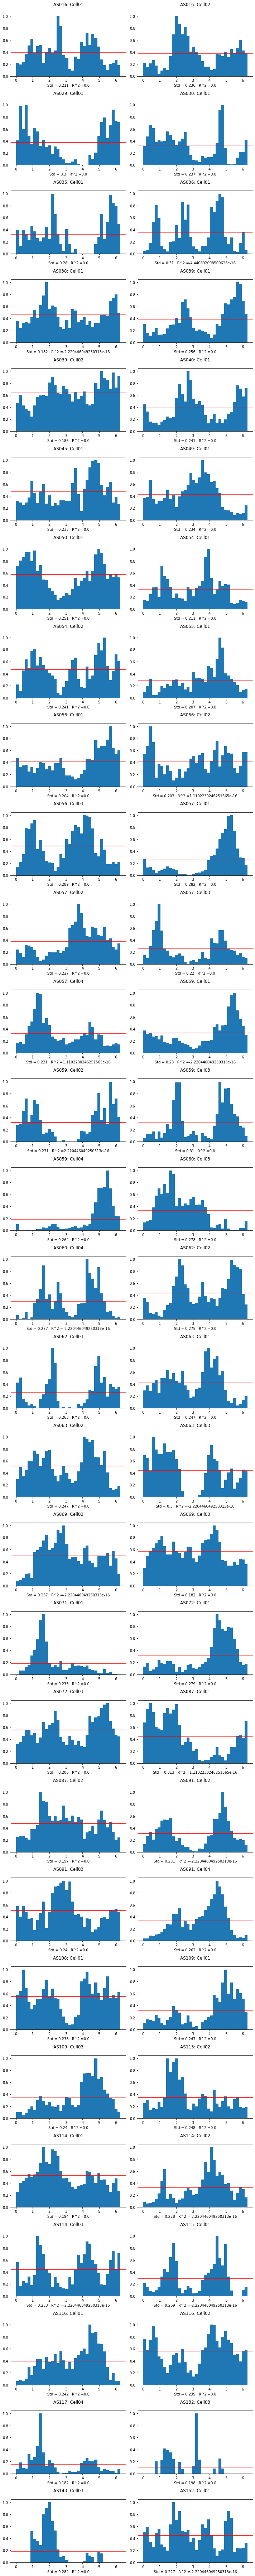

In [8]:
#plot linear histograms
def plot_hist(lengths,location,title,std,avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(29,2,location, polar=False)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    r2=skl.r2_score(lengths, avrg)
    ax.set_xlabel('Std = ' + str(np.around(std,3))+'   R^2 ='+str(r2))
    ax.axhline(y=avg[0], color ='r', linestyle='-')
    return


fig, axes=plt.subplots(29,2, figsize=(10,100))

for i in range(0,len(dataraw.columns)):
    avg= [mean(dataraw.T.values[i])]*len(dataraw.T.values[i])
    plot_hist(dataraw.T.values[i], i+1, dataraw.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_linear_histograms.png')



In [9]:
print([mean(dataraw.T.values[56])]*len(dataraw.T.values[56]))
print(dataraw.T.values[56])
print(skl.r2_score(dataraw.T.values[57], avg))



[0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192, 0.18339906210914192]
[0.         0.         0.         0.         0.         0.51905618
 0.38628158 0.35607488 0.28544516 0.79768258 0.90564117 1.
 0.68279938 0.5301005  0.21377338 0.08672254 0.10147966 0.03495211
 0.         0.         0.         0.         0.   

In [ ]:
#plot polar histograms
def plot_hist(lengths,location,title,std, avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(29,2,location, polar=True)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    ax.set_xlabel('Std = ' + str(np.around(std,3)))
    return


fig, axes=plt.subplots(29,2, figsize=(10,100))

for i in range(0,len(dataraw.columns)):
    avg= [mean(dataraw.T.values[i])]*len(dataraw.T.values[i])
    plot_hist(dataraw.T.values[i], i+1, dataraw.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_polar_histograms.png')

